<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Longest_Common_Subsequence_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Longest Common Subsequence

Write a function that takes in two strings and returns their longest common subsequence.

A subsequence of a string is a set of characters that aren't necessarily adjacent in the string but that are in the same order as they appear in the string. For instance, the characters `["a", "c", "d"]` form a subsequence of the string `"abcd"`, and so do the characters `["b", "d"]`. Note that a single character in a string and the string itself are both valid subsequences of the string.

You can assume that there will only be one longest common subsequence.

Sample Input

```
str1 = "ZXVVYZW"
str2 = "XKYKZPW"
```



Sample Output

```
["X", "Y", "Z", "W"]
```



## Solution 1

In [1]:
# Time O(nm)
# Space O(nm)

def longestCommonSubsequence(str1, str2):
  # lcs = longest_common_subsequence
  lcs = [[{'letter':None, 'lcs':0, 'previos_i':None, 'previos_j':None} for _ in range(len(str1) + 1)] for _ in range(len(str2) + 1)]
  
  for j in range(1, len(str2) + 1):
    for i in range(1, len(str1) + 1):
      if str1[i - 1] == str2[j - 1]:
        lcs[j][i]['letter'] = str1[i - 1]
        lcs[j][i]['lcs'] = lcs[j - 1][i - 1]['lcs'] + 1
        lcs[j][i]['previos_i'] = i - 1
        lcs[j][i]['previos_j'] = j - 1

      else:
        if lcs[j - 1][i]['lcs'] > lcs[j][i - 1]['lcs']:
          lcs[j][i]['letter'] = None
          lcs[j][i]['lcs'] = lcs[j - 1][i]['lcs']
          lcs[j][i]['previos_i'] = i
          lcs[j][i]['previos_j'] = j - 1
        else:
          lcs[j][i]['letter'] = None
          lcs[j][i]['lcs'] = lcs[j][i - 1]['lcs']
          lcs[j][i]['previos_i'] = i - 1
          lcs[j][i]['previos_j'] = j

  # display(lcs)
  
  return get_sequence(lcs)

def get_sequence(lcs):
  i = len(lcs[0]) - 1
  j = len(lcs) - 1
  sequence = []

  while i != 0 and j != 0:
    if lcs[j][i]['letter'] != None:
      sequence.append(lcs[j][i]['letter'])
    i, j = lcs[j][i]['previos_i'], lcs[j][i]['previos_j']

  return list(reversed(sequence))

In [2]:
def display(lcs):
  print(' ', end=' ')
  for i in range(len(str1)):
    print('%2s' % str1[i], end=' ')
  print('\n', end='')
  for j in range(1, len(str2) + 1):
    if j == 0:
      print(' ', end=' ')
    else:
      print(str2[j - 1], end=' ')

    for i in range(1, len(str1) + 1):
      print('%2s' % lcs[j][i]['lcs'], end=' ')

    print('\n', end='')

In [3]:
str1 = "ZXVVYZW"
str2 = "XKYKZPW"
print(longestCommonSubsequence(str1, str2))

['X', 'Y', 'Z', 'W']


In [4]:
str1 = "ABCDEFG"
str2 = "ABCDEFG"
print(longestCommonSubsequence(str1, str2))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [5]:
str1 = "clement"
str2 = "antoine"
print(longestCommonSubsequence(str1, str2))

['n', 't']


In [6]:
str1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
str2 ="CCCDDEGDHAGKGLWAJWKJAWGKGWJAKLGGWAFWLFFWAGJWKAGTUV"
print(longestCommonSubsequence(str1, str2))

['C', 'D', 'E', 'G', 'H', 'J', 'K', 'L', 'T', 'U', 'V']


### Conceptual Note

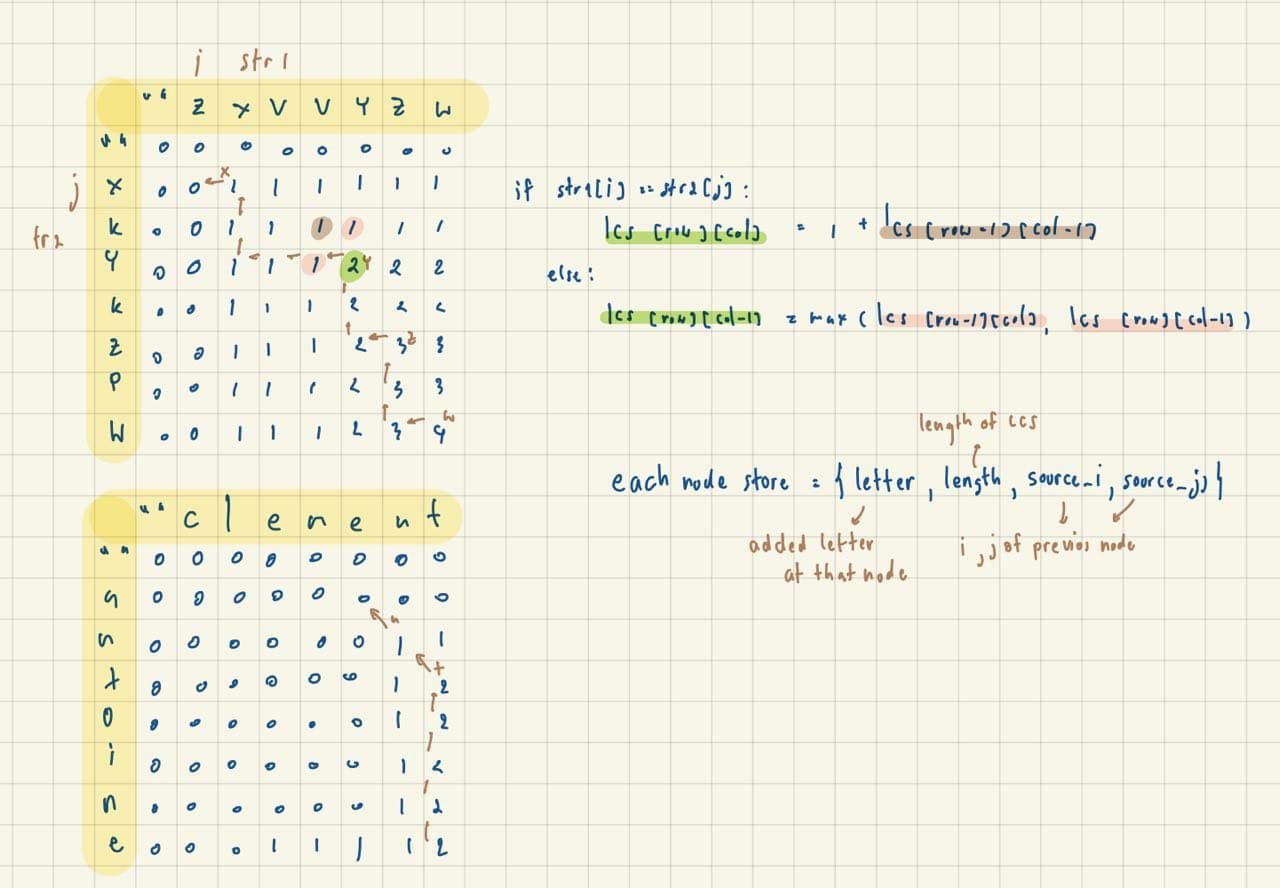

## Solution 2

Solution 2 applied the same idea as solution 1 but we store only longest lenght in the array a loop to track back. No need to store pointer as we know that we shold track back from highest lcs if we not found the letter and diagonal way if we found the letter.

Anyway, this will not improve space complexity but we use 4 times less space.

In [7]:
def longestCommonSubsequence(str1, str2):
	longest_lenght = [[0 for _ in range(len(str1) + 1)] for _ in range(len(str2) + 1)]

	for j in range(1, len(str2) + 1):
		for i in range(1, len(str1) + 1):
			if str1[i - 1] == str2[j - 1]:
				longest_lenght[j][i] = 1 + longest_lenght[j - 1][i - 1]
			else:
				longest_lenght[j][i] = max(longest_lenght[j - 1][i], longest_lenght[j][i - 1])

	return get_sequence(longest_lenght, str1)

def get_sequence(longest_lenght, str):
	i = len(longest_lenght[0]) - 1
	j = len(longest_lenght) - 1
	sequence = []

	while i != 0 and j != 0:
		if longest_lenght[j][i] == longest_lenght[j][i - 1]:
			i -= 1
		elif longest_lenght[j][i] == longest_lenght[j - 1][i]:
			j -= 1
		else:
			sequence.append(str[i- 1])
			i -= 1
			j -= 1

	return list(reversed(sequence))

In [8]:
str1 = "ZXVVYZW"
str2 = "XKYKZPW"
print(longestCommonSubsequence(str1, str2))

['X', 'Y', 'Z', 'W']


In [9]:
str1 = "ABCDEFG"
str2 = "ABCDEFG"
print(longestCommonSubsequence(str1, str2))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [10]:
str1 = "clement"
str2 = "antoine"
print(longestCommonSubsequence(str1, str2))

['n', 't']


In [11]:
str1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
str2 ="CCCDDEGDHAGKGLWAJWKJAWGKGWJAKLGGWAFWLFFWAGJWKAGTUV"
print(longestCommonSubsequence(str1, str2))

['C', 'D', 'E', 'G', 'H', 'J', 'K', 'L', 'T', 'U', 'V']
